## Import Statements

In [1]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

import sklearn.metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score


In [3]:
df=pd.read_csv("Extracted_Features.csv")

In [4]:
labels=df["label"]

In [5]:
data=df.drop(['filename',"label"],axis=1)
data.head()

,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,chroma_feature2,chroma_feature3,chroma_feature4,chroma_feature5,chroma_feature6,chroma_feature7,chroma_feature8,chroma_feature9,chroma_feature10,chroma_feature11
0,0.027708,822.680638,981.072526,1262.673903,0.053256,-368.967957,208.658691,-22.032309,19.130318,-4.204968,...,0.207048,0.070548,0.147452,0.477905,0.626459,0.151434,0.110314,0.066976,0.148548,0.484164
1,0.030345,792.697670,1011.565049,1386.903921,0.046000,-367.093872,202.384766,-19.639700,26.754717,9.071178,...,0.105177,0.087379,0.185234,0.329481,0.653725,0.147405,0.113239,0.196123,0.088872,0.145747
2,0.043772,754.131484,818.186440,1282.385066,0.050755,-335.096588,232.035736,-28.312624,5.986394,4.942239,...,0.494817,0.221615,0.193345,0.196928,0.726970,0.212705,0.283977,0.484048,0.166477,0.131439
3,0.013009,780.648826,1009.536041,1193.519193,0.050901,-460.787140,207.256363,-3.270107,5.706173,3.388237,...,0.517036,0.222859,0.502949,0.298696,0.076878,0.166129,0.111350,0.257231,0.080106,0.036364
4,0.022567,727.330357,896.024404,1209.834736,0.041331,-404.348633,210.581635,-11.188134,9.544372,7.744558,...,0.322592,0.139511,0.302399,0.312285,0.162535,0.362996,0.116259,0.172835,0.334886,0.242847


# Dimensionality Reduction (PCA)

In [6]:
sc=StandardScaler()
data_scaled=sc.fit_transform(data)
data=pd.DataFrame(data_scaled)

In [7]:
pc = PCA(n_components=30)

In [8]:
pc.fit(data)

PCA(n_components=30)

In [9]:
pc.explained_variance_

array([7.63263668e+00, 2.97113076e+00, 2.09497924e+00, 1.73607813e+00,
       1.58306821e+00, 1.34434039e+00, 1.23970628e+00, 1.18830665e+00,
       1.04501404e+00, 9.33993547e-01, 9.05504283e-01, 8.10160338e-01,
       7.70543312e-01, 6.72712520e-01, 6.22837710e-01, 5.81483825e-01,
       5.49559111e-01, 5.28766838e-01, 5.02631178e-01, 4.21034049e-01,
       3.76461410e-01, 3.64006741e-01, 3.40658988e-01, 3.28779483e-01,
       1.96588570e-01, 1.20228735e-01, 8.85239608e-02, 4.63669575e-02,
       1.67490463e-02, 4.10774699e-03])

In [10]:
print(sum(pc.explained_variance_))
var= pc.explained_variance_ratio_

30.016958733747863


In [11]:
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)


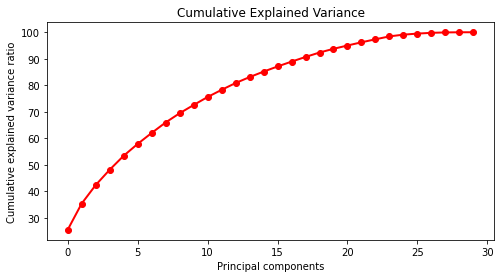

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(range(30),var1,'ro-', linewidth=2)
plt.title('Cumulative Explained Variance')
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Principal components')
plt.show()

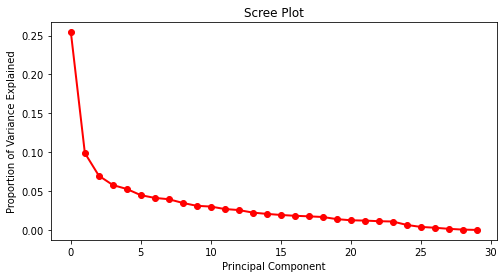

In [13]:
plt.figure(figsize=(8,4))
plt.plot(range(30),var, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [14]:
pca=PCA(n_components=20)
data_new=pca.fit_transform(data)

In [15]:
data_pca=pd.DataFrame(data_new)

In [16]:
data_pca.columns=[f"PCA_{i+1}" for i in data_pca.columns]

In [17]:
dataset=pd.concat([data_pca,labels],axis=1)

In [18]:
dataset = shuffle(dataset)

In [19]:
dataset.shape

(1770, 21)

# Model Preperation

* Label encoding
* Train and Test Split

In [20]:
instru_list = dataset.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

In [21]:
X=dataset.iloc[:, :-1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1234456)

In [23]:
X_train.shape

(1416, 20)

In [24]:
X_test.shape

(354, 20)

### Support Vector Machines

In [25]:
svclassifier = SVC(kernel='rbf',random_state=259641)
svclassifier.fit(X_train, y_train)
predicted_labels = svclassifier.predict(X_test)


In [26]:
print(mt.classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.82      0.84       120
           1       0.81      0.69      0.74       116
           2       0.74      0.90      0.81       118

    accuracy                           0.80       354
   macro avg       0.81      0.80      0.80       354
weighted avg       0.81      0.80      0.80       354



In [27]:
cm=confusion_matrix(y_test, predicted_labels)
cm

array([[ 98,  11,  11],
       [ 10,  80,  26],
       [  4,   8, 106]], dtype=int64)

### Random Forest

In [28]:
RFClassifier = RandomForestClassifier(random_state=128649)
RFClassifier.fit(X_train, y_train)
predicted_labels = RFClassifier.predict(X_test)


In [29]:
print(mt.classification_report(y_test,RFClassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       120
           1       0.81      0.68      0.74       116
           2       0.77      0.90      0.83       118

    accuracy                           0.81       354
   macro avg       0.81      0.81      0.81       354
weighted avg       0.81      0.81      0.81       354



In [30]:
cm1=confusion_matrix(y_test, predicted_labels)
cm1

array([[101,  10,   9],
       [ 14,  79,  23],
       [  3,   9, 106]], dtype=int64)

### Xgboost

In [31]:
XGBvlassifier = XGBClassifier(random_state=1289564,use_label_encoder=False)
XGBvlassifier.fit(X_train, y_train)
predicted_labels = XGBvlassifier.predict(X_test)

[18:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Josmi Agnes Jose\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [32]:
print(mt.classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       120
           1       0.79      0.66      0.72       116
           2       0.76      0.87      0.81       118

    accuracy                           0.79       354
   macro avg       0.79      0.79      0.79       354
weighted avg       0.79      0.79      0.79       354



In [33]:
cm2=confusion_matrix(y_test, predicted_labels)
cm2

array([[ 99,  11,  10],
       [ 16,  77,  23],
       [  5,  10, 103]], dtype=int64)

### K Nearest Neighbor

In [34]:
classifier = KNeighborsClassifier(n_neighbors = 66)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [35]:
cm3 = confusion_matrix(y_test, y_pred)
cm3


array([[101,   2,  17],
       [ 28,  50,  38],
       [  6,   5, 107]], dtype=int64)

In [36]:
print(mt.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       120
           1       0.88      0.43      0.58       116
           2       0.66      0.91      0.76       118

    accuracy                           0.73       354
   macro avg       0.76      0.73      0.71       354
weighted avg       0.76      0.73      0.71       354

